In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install insightface
!pip install mtcnn
!pip install gdown PyDrive
!pip install onnxruntime
!pip install numpy==1.23.3
!pip install mxnet-cu112
!pip install opencv-python-headless
!pip install facenet-pytorch

In [46]:
import os
import cv2
import numpy as np
import insightface
from matplotlib import pyplot as plt
import torch
from facenet_pytorch import MTCNN, InceptionResnetV1, extract_face
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mtcnn = MTCNN(image_size=160, margin=0, min_face_size=20, thresholds=[0.8, 0.9, 0.9], factor=0.709, post_process=True, device=device)
resnet = InceptionResnetV1(pretrained='vggface2').eval().to(device)

train_dir = '/content/drive/MyDrive/Images/Dataset/TRAIN/'
test_dir = '/content/drive/MyDrive/Images/Dataset/TEST/'

model = insightface.app.FaceAnalysis()
ctx_id = 0  # to use GPU
model.prepare(ctx_id=ctx_id)

face_db = {}

X_train = []
y_train = []

for person in os.listdir(train_dir):
    person_dir = os.path.join(train_dir, person)
    for image_name in os.listdir(person_dir):
        image_path = os.path.join(person_dir, image_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        face = mtcnn(image)
        emb = resnet(face.unsqueeze(0).to(device)).detach().cpu().numpy()
        X_train.append(emb)
        y_train.append(person)

X_train = np.concatenate(X_train)
X_train = X_train.reshape(len(X_train), -1)
y_train = np.array(y_train)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

clf = SVC(probability=True)
clf.fit(X_train, y_train_enc)

for person in os.listdir(train_dir):
    person_dir = os.path.join(train_dir, person)
    emb_list = []

    for img_name in os.listdir(person_dir):
        img_path = os.path.join(person_dir, img_name)
        img = cv2.imread(img_path)

        faces = model.get(img)

        if faces:
            face = faces[0]
            emb = face.normed_embedding
            emb_list.append(emb)

    if emb_list:
        face_db[person] = np.mean(emb_list, axis=0)

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "009.jpg" recognized as Alfi


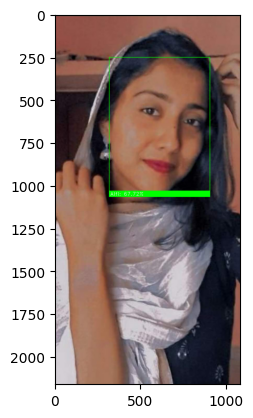

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "test33.jpeg" recognized as unknown


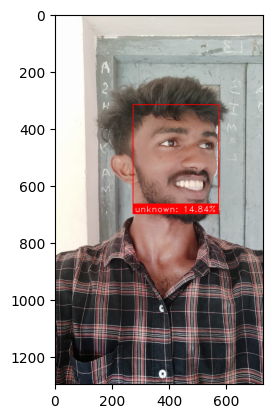

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "sree.jpg" recognized as Sreelakshmi


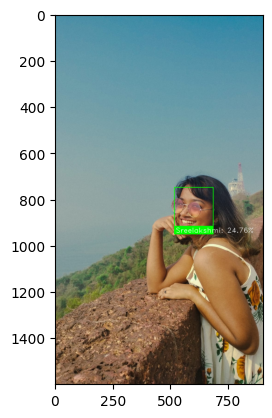

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "testtt.jpeg" recognized as unknown


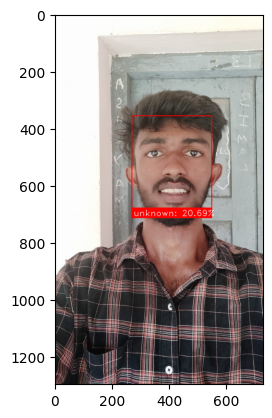

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "jan.jpg" recognized as Janaki


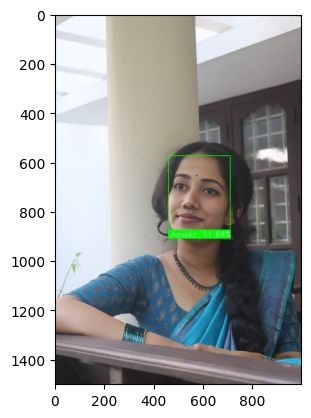

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "sush.jpg" recognized as Susanth


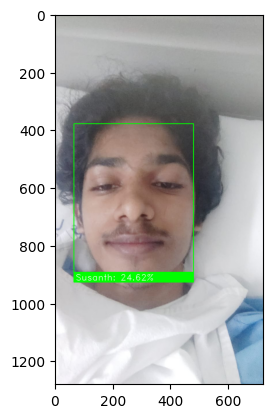

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "022.jpg" recognized as Neethu


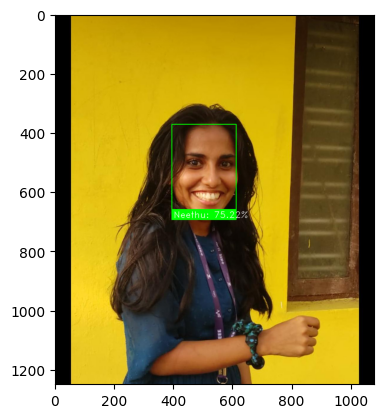

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "004.jpg" recognized as Sangeetha


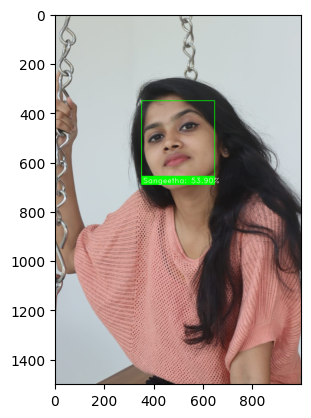

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "008.jpg" recognized as GIRL


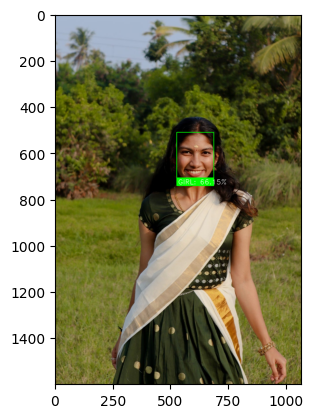

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "filetest.jpeg" recognized as unknown


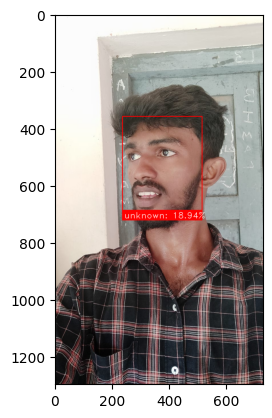

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "025.jpg" recognized as Parthiv


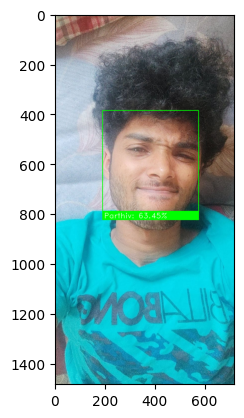

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "005.jpg" recognized as Devu


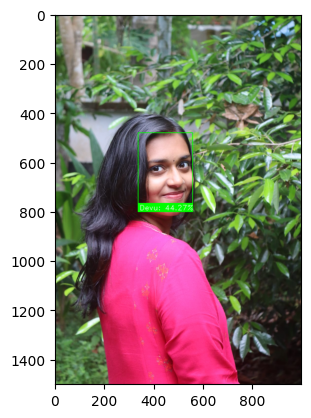

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "011.jpg" recognized as Ijas


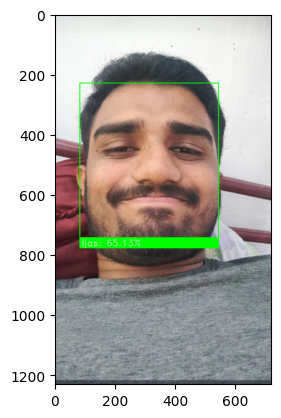

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "015.jpg" recognized as Alfi


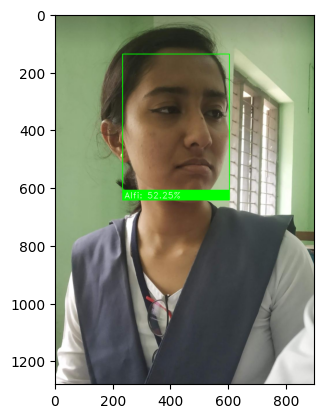

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "010.jpg" recognized as Alister


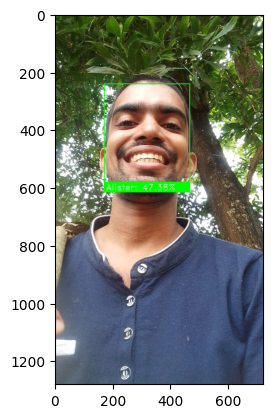

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "006.jpg" recognized as Abhi


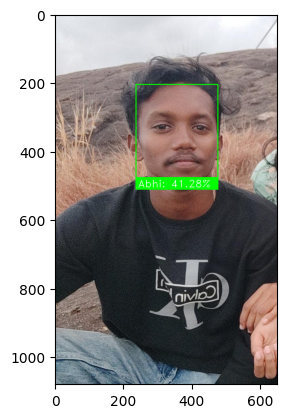

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "007.jpg" recognized as Alister


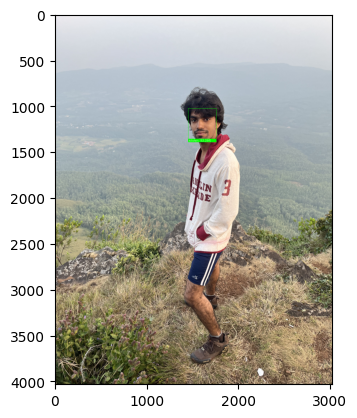

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "001.jpg" recognized as Sno


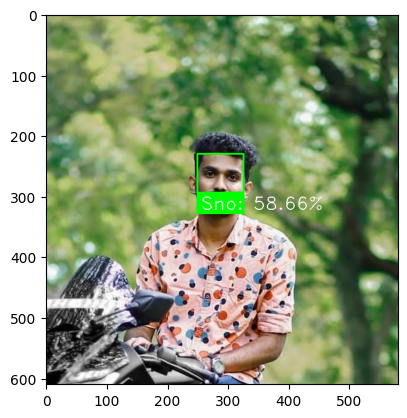

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "002.jpg" recognized as Gopa


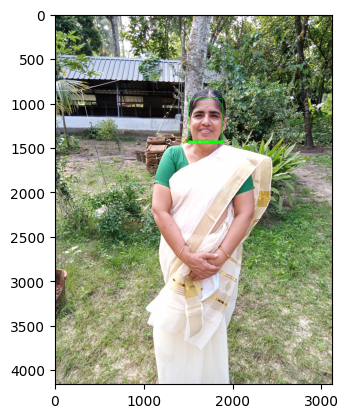

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "018.jpg" recognized as Meenu


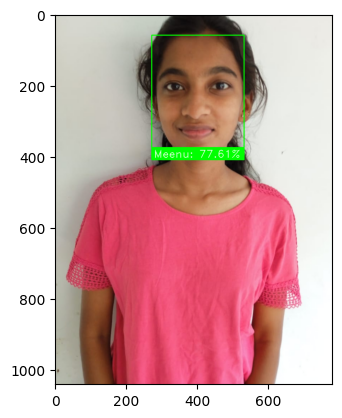

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "IMG20230512172456.jpg" recognized as unknown


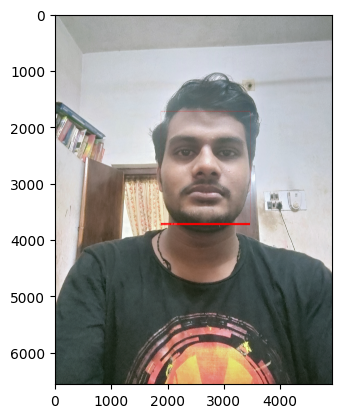

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "IMG20230512172458.jpg" recognized as unknown


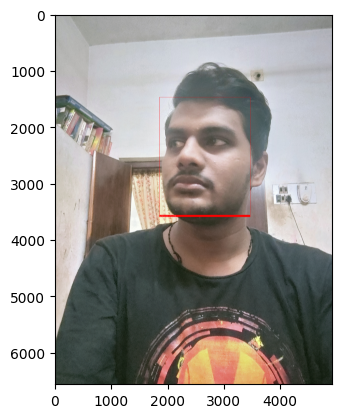

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "IMG20230512172551.jpg" recognized as unknown


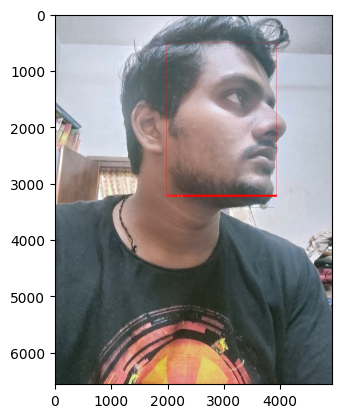

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


The face in "imgggg.jpg" recognized as Alfi


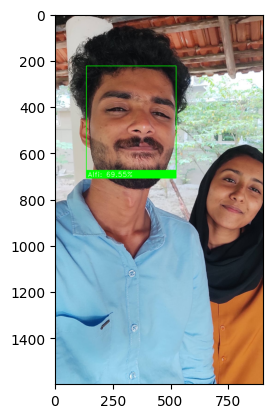

In [47]:
THRESHOLD_INSIGHTFACE = 0.9  # Threshold for InsightFace
THRESHOLD_FACENET = 1.0  # Threshold for Facenet

for image_name in os.listdir(test_dir):
    image_path = os.path.join(test_dir, image_name)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    face = mtcnn(image)
    emb = resnet(face.unsqueeze(0).to(device)).detach().cpu().numpy()

    prediction = clf.predict(emb)
    proba = clf.predict_proba(emb)

    person_name_facenet = le.inverse_transform(prediction)[0] if np.max(proba) > THRESHOLD_FACENET else "unknown"

    faces = model.get(image)

    if faces:
        face = faces[0]
        emb = face.normed_embedding

        min_dist = 1000000  # Large arbitrary value
        person_name_insightface = 'unknown'

        for name, saved_emb in face_db.items():
            dist = np.linalg.norm(saved_emb - emb)

            if dist < min_dist:
                min_dist = dist
                person_name_insightface = name

        person_name_insightface = person_name_insightface if min_dist < THRESHOLD_INSIGHTFACE else 'unknown'

    if person_name_insightface == 'unknown' and person_name_facenet == 'unknown':
        person_name = 'unknown'
    elif person_name_insightface != 'unknown':
        person_name = person_name_insightface
    else:
        person_name = person_name_facenet

    color = (0, 255, 0) if person_name != "unknown" else (255, 0, 0)  # green for recognized, red for unknown
    text = "{}: {:.2f}%".format(person_name, np.max(proba) * 100)

    boxes, _ = mtcnn.detect(image)
    x1, y1, x2, y2 = boxes[0].astype(int)
    cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)

    cv2.rectangle(image, (x1, y2 - 35), (x2, y2), color, cv2.FILLED)
    font = cv2.FONT_HERSHEY_DUPLEX
    cv2.putText(image, text, (x1 + 6, y2 - 6), font, 1.0, (255, 255, 255), 1)

    print('The face in "{}" recognized as {}'.format(image_name, person_name))

    plt.imshow(image)
    plt.show()